Twitter Sentiment Analysis:
Problem: https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/
The original task is to identify the tweets which are hate tweets and which are not.
Below is to do a word cloud, sentiment analysis and topic modeling.

In [8]:
#https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
#https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option('display.max_colwidth', -1) #to display all contents in a cell
import numpy as np
np.set_printoptions(threshold=np.nan)

In [9]:
train=pd.read_csv("dataset/tweet/train_E6oV3lV.csv")
train.loc[train['label']==1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [7]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [27]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
train['stopwords']=train['tweet'].apply(lambda x: ' '.join(word for word in x.split() if word in stop))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,user father dysfunctional selfish drags kids dysfunction run,
1,user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,
2,bihday majesty,
3,model love u take u time urð ðððð ððð,
4,factsguide society motivation,


In [28]:
train['tweet']=train['tweet'].str.replace('[^\w\s]','')    #remove any starting word characters and whitespace 
train['tweet'].head()       #\d, \w, \s shorthand character classes matching digits, word characters, and whitespace.

0    user father dysfunctional selfish drags kids dysfunction run                                     
1    user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked
2    bihday majesty                                                                                   
3    model love u take u time urð ðððð ððð                                                            
4    factsguide society motivation                                                                    
Name: tweet, dtype: object

In [29]:
#remove stop words
from nltk.corpus import stopwords
stop=stopwords.words('english')
train['tweet']=train['tweet'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop))

In [30]:
#find 50 most common words
haha=pd.Series(' '.join(train['tweet']).split()).value_counts()[:50]
haha.index

Index(['user', 'love', 'ð', 'day', 'â', 'happy', 'amp', 'im', 'u', 'time',
       'life', 'like', 'today', 'new', 'positive', 'thankful', 'get', 'people',
       'good', 'bihday', 'cant', 'ððð', 'one', 'ðð', 'see', 'dont', 'fathers',
       'smile', 'go', 'want', 'take', 'work', 'healthy', 'weekend', 'fun',
       'make', 'summer', 'got', 'best', 'us', 'need', 'friday', 'way', 'great',
       'bull', 'family', 'beautiful', '2', 'going', 'friends'],
      dtype='object')

In [31]:
#most common 50 words
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
import matplotlib
import seaborn as sns

<function matplotlib.pyplot.tight_layout>

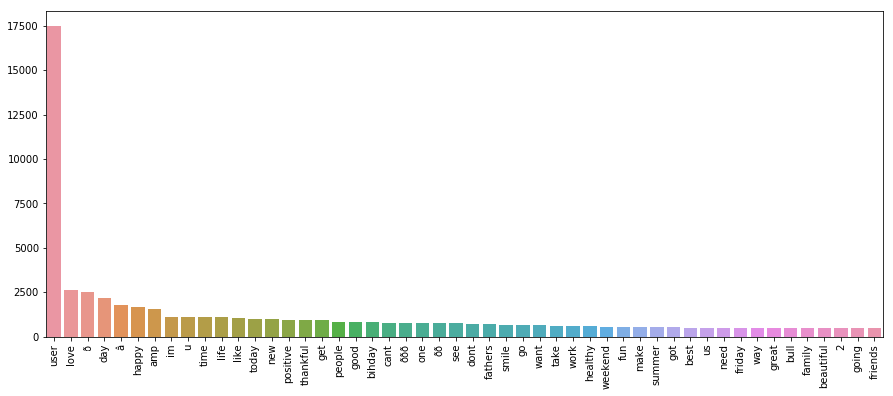

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x=haha.index, 
            y=haha.values)
plt.xticks(rotation=90)

font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
plt.tight_layout

(-0.5, 399.5, 199.5, -0.5)

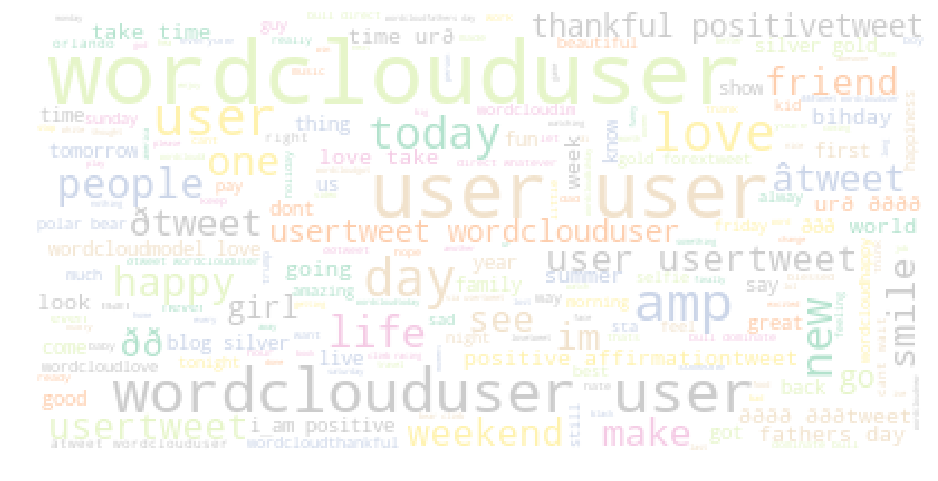

In [34]:
#wordCloud
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=10000, 
                stopwords=STOPWORDS, max_font_size= 40)
wc.generate("tweet wordcloud".join(train['tweet']))
plt.title("", fontsize=20)

plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17))
plt.axis('off')

In [ ]:
#tokenize 
from nltk import word_tokenize
train['tokenized_text'] = train["tweet"].apply(lambda row: word_tokenize(row))
train[['tweet','tokenized_text']].head()

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
train['tweet_lemm']=train['tweet'].apply(lambda x: " ".join(lemmatizer.lemmatize(w) for w in x.split()))
#train['tweet_lemm']=train['tokenized_text'].apply(lambda x: " ".join(lemmatizer.lemmatize(w) for w in x)) 
train['tweet_lemm'].head()

In [7]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
train_bow=cv.fit_transform(train['tweet'])

We can improve on Bag of words by adjusting word counts based on their frequency in corpus (the group of all the documents)
we can use TF-IDF (Term Frequency - Inverse Document Frequency)
Wx,y=tfx,y * log(N/dfx)  
   Wx,y = Term x within document y
   tfx,y  = frequency of x in y
   dfx  = number of documents containing x
   N = total number of documents

In [15]:
#Sentiment Analyss
from textblob import TextBlob
train['sentiment']=train['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
#Return a tuple of form (polarity, subjectivity) where polarity s a float within the range [-1,1]
#subjectivity is a float within the range [0,1] where 0 is very objective and 1 is very subjective.
train.head(50)

,id,label,tweet,stopwords,sentiment
0,1,0,user father dysfunctional selfish drags kids dysfunction run,when a is and is so he his into his,-0.500000
1,2,0,user user thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked,for i they don't in,0.200000
2,3,0,bihday majesty,your,0.000000
3,4,0,model love u take u time urð ðððð ððð,i with all the in,0.500000
4,5,0,factsguide society motivation,now,0.000000
5,6,0,22 huge fan fare big talking leave chaos pay disputes get allshowandnogo,and before they and when they,0.200000
6,7,0,user camping tomorrow user user user user user user user dannyâ,,0.000000
7,8,0,next school year year examsð cant think ð school exams hate imagine actorslife revolutionschool girl,the is the for about that,-0.400000
8,9,0,love land allin cavs champions cleveland clevelandcavaliers â,we the,0.500000
9,10,0,user user welcome im gr8,here it's so,0.800000


In [22]:
#from above examples hate tweets don't seem to have more of a negative polarity, check the values to see:
train.groupby(['label'])['sentiment'].mean()
#both groups have same minmum, max, and median, hate tweets have a slightly negative mean 
#and normal tweets have a small postive mean

label
0    0.160919
1   -0.005706
Name: sentiment, dtype: float64

In [10]:
#Topic modeling
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=25, random_state=0)
document_topics=lda.fit_transform(train_bow)
lda.components_.shape

(10, 1000)

In [11]:
sorting=np.argsort(lda.components_, axis=1)[:,::-1]
feature_names=np.array(cv.get_feature_names())
import mglearn

In [12]:
mglearn.tools.print_topics(topics=range(10),feature_names=feature_names,sorting=sorting,topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
user          day           people        love          happy         
amp           fathers       need          time          smile         
positive      good          friday        ððð           weekend       
make          great         makes         life          love          
affirmation   today         bear          want          summer        
i_am          morning       world         ðððð          friends       
thanks        tomorrow      polar         model         fun           
2016          fathersday    climb         bull          family        
ready         love          change        live          sunday        
getting       happy         city          urð           cute          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
new 

Summary:
1.There are slangs and abbreviations in the notes, no suprise since it is from tweets, I didn't do the correctting spelling 
  since it could change the original meaning.
2.Looks like thankful, glad and etc positive words are affluent in tweets, which also seems normal for a social media.
3.check the keywords of above topics we can see that topic 1 seems like a father day celebration,
   and topic 7 sounds like trump related tweets.